# Preparação do estado de bit-flip

In [21]:
from sympy import cos, sin, sqrt, pi, Matrix, Symbol, exp, print_latex, simplify
#from sympy.physics.quantum import TensorProduct, Dagger
import numpy as np
from numpy import linspace
#import matplotlib.pyplot as plt
#import math
from theoric.tools import *
#import torch
from torch import tensor

theta = Symbol('theta',real=True)
phi = Symbol('phi',real=True)
gamma = Symbol('gamma',real=True, positive=True)
p = Symbol('p',real=True, positive=True)



def calculated_rho_AB(theta, phi, p):
    state = Matrix([[(sqrt(1-p)*cos(theta/2)),
                    (sqrt(p)*exp(1j*phi)*sin(theta/2)),
                    (sqrt(1-p)*exp(1j*phi)*sin(theta/2)),
                    sqrt(p)*cos(theta/2)]])
    M_numpy = np.array(state.tolist(), dtype=np.complex64)
    return M_numpy
    #return state

def get_target_op(func_estado):
    state1 = simplify(func_estado)
    state2 = np.zeros(4,dtype=complex)
    aux = 0
    for i in state1[0]:
        state2[aux] = i
        aux += 1
    target_op = np.outer(state2.conj(), state2)
    target_op = tensor(target_op)
    return target_op

#state = calculated_rho_AB(theta, phi, p)
state = calculated_rho_AB(pi/2, 0, 0)
state

array([[0.70710677+0.j, 0.        +0.j, 0.70710677+0.j, 0.        +0.j]],
      dtype=complex64)

In [22]:
a = get_target_op(calculated_rho_AB(pi/2, 0, 1))
a


tensor([[0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.5000+0.j, 0.0000+0.j, 0.5000+0.j],
        [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
        [0.0000+0.j, 0.5000+0.j, 0.0000+0.j, 0.5000+0.j]],
       dtype=torch.complex128)

In [23]:
'''                                  ReadMe                                                      '''
'''# Nessa célula vamos apenas mudar a função geradora do estado a ser preparado                 '''
'''# Basta alterar a função que gera o estado, nesse caso target_op = init_state_ref(n_qubits, p)'''

from src.vqa_tools import general_vqacircuit_penny 
from src.generalize import *
from torch import tensor
from numpy import sin,cos,sqrt,outer,zeros, pi
import cmath
import pickle
from theoric.bf_theoric import *

def run_calcs(list_p, epochs):
    coerencias_R = []
    coerencias_L = []
    pretrain = True
    count = 0
    n_qubits = 2
    depht = 3
    _, params, _, _ = start_things(n_qubits, depht)
    for p in list_p:
        print(f'{count} de {len(list_p)}')
        count += 1
        circuit, _ = general_vqacircuit_penny(params, n_qubits, depht)

        # defina o estado a ser preparado abaixo
        #------------------------------------------------------------
        #target_op = bpf(pi/2, 0, p)
        target_op = get_target_op(calculated_rho_AB(pi/2, 0, p))
        #------------------------------------------------------------
    
        qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op, pretrain, 1)#120)
        pretrain = False
        rho = tomograph(qc, qr)
        print(rho)
        coerencias_L, coerencias_R = results(rho, coerencias_R, coerencias_L)
    mylist = [coerencias_L, coerencias_R]
    with open('data/bf/bf-coherences.pkl', 'wb') as f:
        pickle.dump(mylist, f)
    with open('data/bf/bf-best_params.pkl', 'wb') as f:
        pickle.dump(params, f)
    plot_theoric_bf(list_p)
    plots(list_p, coerencias_R, coerencias_L)
    #save = [list_p, coerencias_R, coerencias_L]
    #with open('data/BPFlist_p-coerencias_R-coerencias_L.pkl', 'wb') as f:
    #    pickle.dump(save, f)
    

0 de 4
[[ 0.61436944+0.j          0.3943424 +0.12535311j -0.19794152+0.06797977j
   0.02577217-0.13157427j]
 [ 0.3943424 -0.12535311j  0.28161614+0.j         -0.11455294+0.08153807j
  -0.01133529-0.0907154j ]
 [-0.19794152-0.06797977j -0.11455294-0.08153807j  0.07404661+0.j
  -0.02152609+0.03913473j]
 [ 0.02577217+0.13157427j -0.01133529+0.0907154j  -0.02152609-0.03913473j
   0.02996782+0.j        ]]
1 de 4
[[0.40680426+0.j         0.4206911 +0.14078171j 0.08647202+0.10653333j
  0.15007081-0.02229746j]
 [0.4206911 -0.14078171j 0.48955646+0.j         0.12611173+0.08156364j
  0.1458735 -0.07537495j]
 [0.08647202-0.10653333j 0.12611173-0.08156364j 0.04658591+0.j
  0.02602329-0.04366247j]
 [0.15007081+0.02229746j 0.1458735 +0.07537495j 0.02602329+0.04366247j
  0.05705336+0.j        ]]
2 de 4
[[0.21276642+0.j         0.24641429+0.11321632j 0.21342483+0.04917959j
  0.20824706-0.03832165j]
 [0.24641429-0.11321632j 0.34669607+0.j         0.27496343-0.0562577j
  0.22087834-0.15657543j]
 [0.2134

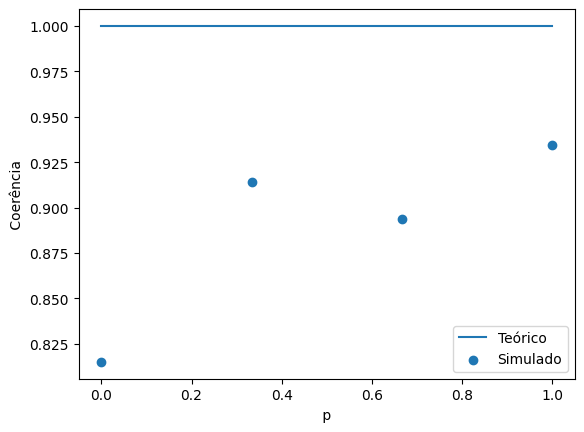

In [24]:
list_p = np.linspace(0,1,4)#21)
run_calcs(list_p, 2)

In [1]:
from theoric.bf_theoric import *

a = theoric_rho_A_bf(theta,phi,p)
a
#plt.show()

Matrix([[p*sin(theta/2)**2 + (1 - p)*cos(theta/2)**2, (2.0*I*p*sin(phi) + exp(-1.0*I*phi))*sin(theta/2)*cos(theta/2)], [(-2.0*I*p*sin(phi) + exp(1.0*I*phi))*sin(theta/2)*cos(theta/2), p*cos(theta/2)**2 + (1 - p)*sin(theta/2)**2]])


Matrix([
[                   p*sin(theta/2)**2 + (1 - p)*cos(theta/2)**2, (2.0*I*p*sin(phi) + exp(-1.0*I*phi))*sin(theta/2)*cos(theta/2)],
[(-2.0*I*p*sin(phi) + exp(1.0*I*phi))*sin(theta/2)*cos(theta/2),                    p*cos(theta/2)**2 + (1 - p)*sin(theta/2)**2]])

(2, 21)
[0.9942813046768506, 0.8919415317249151, 0.790960534572855, 0.6829335001116109, 0.6355435641402459, 0.47931582051195676, 0.41257091761957876, 0.3209937954490334, 0.21876622362901926, 0.07182892337515089, 0.06682305541384989, 0.18280155112573948, 0.18147270050394324, 0.3075818315768039, 0.4502199008874097, 0.4412880453769122, 0.587198898460232, 0.666250448915245, 0.7492812496840455, 0.9135161950802383, 0.9981958109625721]


<function matplotlib.pyplot.show(close=None, block=None)>

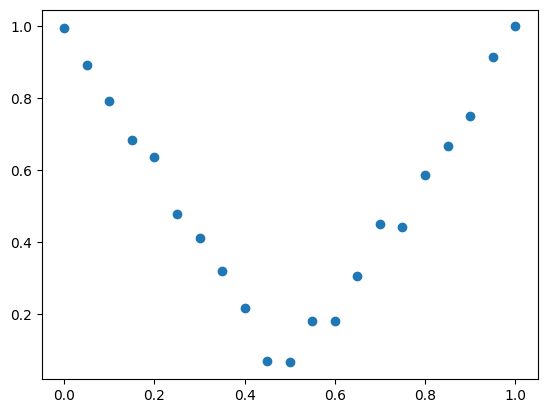

In [13]:
import pickle
with open('data/bf/bf-coherences.pkl', 'rb') as f:
    cohs = pickle.load(f)
print(np.shape(cohs))
print(cohs[0])
x = np.linspace(0,1,len(cohs[0]))
plt.scatter(x,cohs[0])
plt.show

In [7]:
import pickle
with open('data/bf/bf-best_params.pkl', 'rb') as f:
    params = pickle.load(f)
print(np.shape(params))
print(cohs[0])

torch.Size([24])
tensor(-2.3212, dtype=torch.float64, grad_fn=<SelectBackward0>)


0 de 21
[[ 0.41377111+0.j          0.41665125-0.1196129j  -0.06496887-0.18635655j
   0.08264048-0.08688905j]
 [ 0.41665125+0.1196129j   0.45463556+0.j         -0.01214002-0.20708669j
   0.1087507 -0.06425511j]
 [-0.06496887+0.18635655j -0.01214002+0.20708669j  0.09566163+0.j
   0.02650879+0.05215934j]
 [ 0.08264048+0.08688905j  0.1087507 +0.06425511j  0.02650879-0.05215934j
   0.0359317 +0.j        ]]
1 de 21
[[ 0.51861851+0.j          0.47449555+0.03059113j  0.07030246+0.07856922j
  -0.09359288-0.01748334j]
 [ 0.47449555-0.03059113j  0.43932605+0.j          0.06842165+0.07075668j
  -0.08769581-0.01002619j]
 [ 0.07030246-0.07856922j  0.06842165-0.07075668j  0.02420123+0.j
  -0.01477387+0.01265812j]
 [-0.09359288+0.01748334j -0.08769581+0.01002619j -0.01477387-0.01265812j
   0.01785421+0.j        ]]
2 de 21
[[ 0.61333791+0.j          0.42722443+0.01930061j  0.16000353-0.04332652j
  -0.14312   +0.05365j   ]
 [ 0.42722443-0.01930061j  0.30146944+0.j          0.10988326-0.03320023j
  -0.09

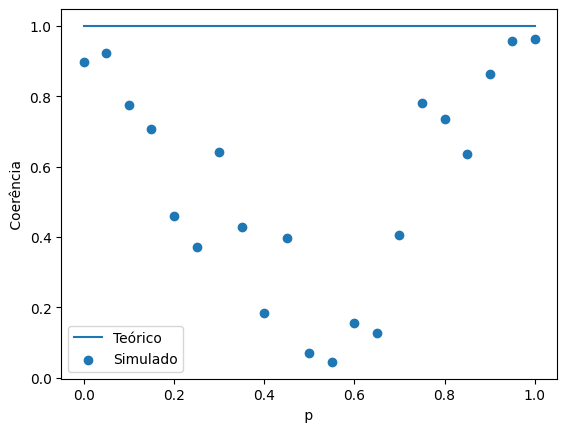

In [12]:
import pickle
from src.vqa_tools import general_vqacircuit_penny 
from src.generalize import *

list_p = np.linspace(0,1,21)
epochs = 10
coerencias_R = []
coerencias_L = []
pretrain = True
count = 0
n_qubits = 2
depht = 3

#------------------------------------------------------------
#_, params, _, _ = start_things(n_qubits, depht)# random start
with open('data/bf/bf-best_params.pkl', 'rb') as f:# start the last otimized params
    params = pickle.load(f)
#------------------------------------------------------------

for p in list_p:
    print(f'{count} de {len(list_p)}')
    count += 1
    circuit, _ = general_vqacircuit_penny(params, n_qubits, depht)
    # defina o estado a ser preparado abaixo
    #------------------------------------------------------------
    #target_op = bpf(pi/2, 0, p)
    target_op = get_target_op(calculated_rho_AB(pi/2, 0, p))
    #------------------------------------------------------------

    pretrain = False
    qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op, pretrain, 120)
    rho = tomograph(qc, qr)
    print(rho)
    coerencias_L, coerencias_R = results(rho, coerencias_R, coerencias_L)
mylist = [coerencias_L, coerencias_R]
with open('data/bf/bf-coherences-postrain.pkl', 'wb') as f:
    pickle.dump(mylist, f)
with open('data/bf/bf-best_params-postrain.pkl', 'wb') as f:
    pickle.dump(params, f)
plot_theoric_bf(list_p)
plots(list_p, coerencias_R, coerencias_L)

In [ ]:
list_p = np.linspace(0,1,21)
run_calcs(list_p, 10)